### Conjugate gradient method

**Problem of interest**

Given an $n$-by-$n$ symmetric positive definite (SPD) matrix $A$ and a $\mathbb{R}^n$-vector $b$, find $\mathbb{R}^n$-vector $x$ such that

$$ Ax = b. $$


#### Method: Conjugate gradient method

**Data**

- $x_0 \in \mathbb{R}^n$: initial guess

**Initialize**

- $d_0=r_0=b-Ax_0$

**Main computation**

- **for** k = 0, 1, 2, ..., $n$ - 1
    - **if** $r_k = 0$ **stop**, **end**
    - $\alpha_{k}=\frac{r_{k}^{T} r_{k}}{d_{k}^{T} A d_{k}}$ (compute $d_k$ component of error)
    - $x_{k+1}=x_{k}+\alpha_{k} d_{k}$ (subtract it out)
    - $r_{k+1}=r_{k}-\alpha_{k} A d_{k}$ (compute the new residual)
    - $\beta_{k}=\frac{r_{k+1}^{T} r_{k+1}}{r_{k}^{T} r_{k}}$ (compute $d_k$ component of the residual)
    - $d_{k+1}=r_{k+1}+\beta_{k} d_{k}$ (conduct Gram-Schmidt with respect to $A$-inner product)
**end**

**History**

1. First proposed by Schmidt (1908) [^1] (*the* Schmidt in Gram-Schmidt)
1. Independently re-invented by Fox, Huskey, and Wilkinson (1948) [^2]
1. Hestenes and Stiefel (1952) made this idea explicit and practical. [^3]
1. CG does not reach the solution in $n$ steps in practice due to round off errors. It became popular only after Reid (1971) showed its value as an iterative method for large, sparse matrices. [^4] 

[^1]: Schmidt (1908) Uber die Auflosung linearer Gleichungen mit Unendlich vielen unbekannten (accent removed)

[^2]: Fox, Huskey, and Wilkinson (1948) Notes on the solution of algebraic linear simultaneous equations

[^3]: Hestenes and Stiefel (1952) Methods of conjugate gradients for solving linear systems 

[^4]: Reid (1971) On the method of conjugate gradients for the solution of large
	sparse systems of linear equations

In [23]:
import numpy as np

def CG(A, b, x0, tol=1e-9, max_iter=None):
    """
    Conjugate Gradient method for solving linear systems of equations.
    
    Parameters:
        A (ndarray): The coefficient matrix of the linear system.
        b (ndarray): The right-hand side vector of the linear system.
        x0 (ndarray): The initial guess for the solution.
        max_iter (int): The maximum number of iterations (default: 100).
        tol (float): The tolerance for convergence (default: 1e-9).
    
    Returns:
        x (ndarray): The approximate solution to the linear system.
        num_iter (int): The number of iterations performed.
    """
    # default number of iterations is the dimension of the matrix
    if max_iter is None:
        n = A.shape[0]
        max_iter = n

    # initialize
    x = x0
    r = b - A @ x
    d = r

    r_nrm2 = np.dot(r, r)

    for i in range(max_iter + 1): 
        # stopping criterion
        if np.sqrt(r_nrm2) < tol:
            break

        # intermediate computations part 1 
        Ad = A @ d

        # main conjugate gradient iteration part 1
        alpha = r_nrm2 / np.dot(d, Ad)
        x = x + alpha * d
        r_new = r - alpha * Ad
        
        # intermediate computations part 2
        r_new_nrm2 = np.dot(r_new, r_new)
        
        # main conjugate gradient iteration part 2
        beta = r_new_nrm2 / r_nrm2
        d = r_new + beta * d
        
        # updata
        r = r_new
        r_nrm2 = r_new_nrm2
    
    return x, i


In [24]:
# A is of full rank
A = np.array([  [1, 2 , -1],
                [2, 1 , -2],
                [-3, 1,  1]])

# take a SPD matrix
A = A.T @ A

b = np.array([3, 3, -6])

x0 = np.array([0, 0, 0])

x, iter = CG(A, b, x0)
x_true = np.linalg.solve(A, b)

print("x (CG) = ", x, "in", iter, "iterations")
print("x_true = ", x_true)
print("error = ", np.linalg.norm(x - x_true))

x (CG) =  [-3.75 -2.5  -7.25] in 3 iterations
x_true =  [-3.75 -2.5  -7.25]
error =  8.042797661766892e-15


 CG iterations =  501
total CG error =  0.01583511131157574
discretization error =  0.015835111311131165
algebraic error =  5.880979637754619e-13


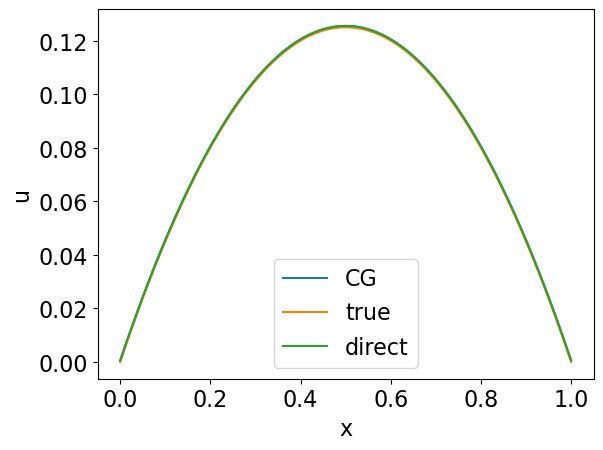

In [25]:
from scipy.linalg import toeplitz

L = 1
n = 1000
h = L / n

x = np.linspace(0, L, n+1)

col = np.zeros(n+1)
col[0:2] = np.array([2, -1]) * (1 / (h*h))

A = toeplitz(col)
b = np.ones(n+1)
x0 = np.zeros(n+1)

u, iter = CG(A, b, x0)
u_true = - 0.5 * x * (x - L)
u_direct = np.linalg.solve(A, b)

# print("u (CG) = ", u, "in", iter, "iterations")
# print("u_true = ", u_true)
print(" CG iterations = ", iter)
print("total CG error = ", np.linalg.norm(u - u_true))
print("discretization error = ", np.linalg.norm(u_direct - u_true))
print("algebraic error = ", np.linalg.norm(u - u_direct))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots()
ax.plot(x, u, label="CG")
ax.plot(x, u_true, label="true")
ax.plot(x, u_direct, label="direct")
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.legend()
plt.show()



#### Notation/Settings

| expression | meaning |
|---|---|
| $x$ | true solution ($Ax=b$) |
| $x_k$ | $k$-th approximate solution by the conjugate gradient method ($k=0,1,2,\cdots$)|
| $e_k$ | $=x - x_k$ (error caused by $x_k$) |
| $r_k$ | $=b-Ax_k$ (residual caused by $x_k$) |
| $d_k$ | conjugate directions |
| $(u,v)$ | $=v^T u$ (standard inner product) |
| $(u,v)_A$ | $=v^T A u$ (A-inner product, where $A$ is a SPD matrix) |
| $v \perp_A u$ | $(u,v)_A =0$ (A-orthogonality) |

#### Idea behind the conjugate gradient method


**Remark**

A minimization approach to conjugate gradient method is also helpful, where we use the equivalence

$$
Ax = b \quad \leftrightarrow \quad \mathrm{minimize} ~ \frac{1}{2} x^T A x - b^T x, \quad \text{subject to} ~ x \in \mathbb{R}^n.
$$

However, this involves more discussions from different angles. Between the trade-off of richness and simplicity in presentation, these notes have chosen the simplicity, and do not discuss minimization approach.


##### Warm up (Gaussian elimination)

1. Change the perspective

View the process of finding the solution as removing components of error one by one. Unless we are extremely lucky, our error caused by the initial guess will be full of possible components. 

For the moment, to avoid introducing too many symbols, let us override the notations and let $d_k$'s be canonical basis of $\mathbb{R}^{n}$. 

We can expand the initial error in the canonical basis.

$$
e_{0}=\sum_{k=0}^{n-1} \eta_k d_k
$$



2. Remove component one by one

Then the back substitution step can be seen as removing $d_{n-2}$ component from the error, then $d_{n-3}$ component, all the way to $d_{0}$. ($d_{n-1}$ component is already absent since the last component of $x$ is precise.)

$$
\begin{bmatrix}
1&-\frac{1}{2}&\frac 3 4 & \frac 7 4 \\
0&1& \frac 3 5 & \frac {26} 5\\
0&0&1& \underbrace{2}_{x_1} 
\end{bmatrix}
\longrightarrow	
\begin{bmatrix}
1&-\frac{1}{2}&0 & -1 \\
0&1& 0& 4\\
0&0&1& \underbrace{2}_{x_2}  
\end{bmatrix}
\longrightarrow	
\begin{bmatrix}
1&0&0 & 1 \\
0&1& 0& 4\\
0&0&1& \underbrace{2}_{x_3}  
\end{bmatrix}
$$

![Gaussian elimination from error improvement point of view](../images/CG01.png)

**Remark**


- Removing $d_k$ from the approximate solution $x_k$ and removing it from the error $e_k$ are equivalent because they differ only by a fixed vector, the true solution $x$, that is, $e_k = x - x_k$. But the signs of $e_k$ and $x_k$ are opposite.




3. Algorithm-friendly summary


Given $x_k$, hence $e_k = x - x_k$, take exact step to remove $d_k$ component each time

$$
e_{k+1}=e_k - \eta_k d_k.
$$

or equivalently, 

$$
x_{k+1}=x_k + \eta_k d_k,
$$

The exact component $\eta_k$ in $d_k$ direction can be computed by the condition $e_{k+1} \perp d_k$ since we just subtracted out $d_k$:

$$
\begin{split}
e_{1}&=\sum_{j=1}^{n-1} \eta_k d_j
\\
e_{2}&=\sum_{j=2}^{n-1} \eta_k d_j
\\
&\vdots
\\
e_{k+1}&=\sum_{j=k+1}^{n-1} \eta_k d_j.
\end{split}
$$

By taking dot product with $d_k$ on both sides of the error update rule $e_{k+1}=e_k - \eta_k d_k$, we can find

$$
\eta_k = \frac{d_k^T e_{k}}{d_k^T d_k}.
$$


**Observation**

- $e_k$ is not computable since we do not know the true solution $x$.
- The residual $r_k:=b - Ax_k$ is computable. 
- Since $r_k = b - A x_k = A x - A x_k = A(x - x_k) = Ae_k$, the residual and the error are related:

$$
r_k = Ae_k
$$

- Though not at all trivial, these observations suggest a possibility to play between A-orthogonality and orthogonality for our needs.

##### Devising conjugate gradient method: Part 1 (main idea)

1. Suppose we have an A-orthogonal basis $\{d_k\}_{k=0}^{n-1}$ for $\mathbb{R}^n$. (We will discuss how to obtain it. For now, assume it is possible.) 



2. View finding the solution as removing $d_k$ component at a time. We can expand the initial error in this basis. 

$$
e_{0}=\sum_{k=0}^{n-1} \alpha_k d_k \quad \text{(error update)}
$$

It is likely that the initial guess contains all components of $d$'s.



3. Suppose we can remove $d_k$ component from the previous error each time (this can be achieved by finding $\alpha_k$ momentarily):

$$
e_{k+1}=e_k - \alpha_k d_k.
$$

Equivalently, we can write this in terms of $x_k$'s

$$
x_{k+1}=x_k + \alpha_k d_k.
$$

Then, we are left with less and less $d_k$ components in the error:

$$
e_{k+1}=\sum_{j=k+1}^{n-1} \alpha_k d_j
$$

since

$$
\begin{split}
e_{1}&=\sum_{j=1}^{n-1} \alpha_k d_j
\\
e_{2}&=\sum_{j=2}^{n-1} \alpha_k d_j
\\
&\vdots
\end{split}
$$

Thus, since $e_{k+1}$ has no $d_k$ component (it has just been removed), we must have $e_{k+1} \perp_{A} d_k$. Use this fact to the error update rule, then we can compute $\alpha_k$:

$$
\alpha_k = \frac{d_k^T A e_k}{d_k^T A d_k}=\frac{d_k^T r_k}{d_k^T A d_k} \quad \text{(computable)}.
$$

**Remark**

- This is where $A$-orthogonality is used in a nice way.
- In the algorithm, we use $\alpha_k$ formula to update $x_k$'s since $e_k$ is not computable during implementation.
- Thus, in theory, the conjugate gradient will eventually exhaust all directions $d_k$'s at most $n$ steps and give the solution. From this point of view, it can be seen as a direct method.

##### Devising conjugate gradient method: Part 2(conjugate directions)

**Question**: How to find the $A$-orthogonal basis $\{d_k\}$?

**Idea**: Gram-Schmidt process with respect to $A$-inner product. We will construct $d_k$'s dynamically as the algorithm proceeds.

**Observation 1**

Computation dependency (incomplete):

$$
x_k, d_k, r_k \longrightarrow \alpha_k \longrightarrow x_{k+1}, r_{k+1} \longrightarrow  d_{k+1} ~ (?)
$$

**Observation 2-(a)**

New residual $r_{k+1}$ guarantees a new direction outside of $\mathrm{span}\{d_0, d_1, \cdots, d_k \}$. In fact, if everything works out as we planned, it is orthogonal to all the past directions:

$$ 
r_{k+1} \perp \mathrm{span} \{ d_j \ : \  0 \le j \le k \}
$$

since, by mutual A-orthogonality between $d_k$'s, 

$$
d_j^T r_{k+1} = d_j^T A e_{k+1} = \sum_{i=k+1}^{n-1} \eta_k d_j^T A  d_i = 0.
$$

**Observation 2-(b)**

![Gram-Schmidt](https://upload.wikimedia.org/wikipedia/commons/7/7b/Linalg_orth_proj_R3.png)

We can extract $d_{k+1}$ from $r_{k+1}$ by filtering out $\{d_0, d_1, \cdots, d_k \}$: Gram-Schmidt.

$$
d_{k+1} = r_{k+1} +\sum_{j=0}^{k}\beta_{j} d_j,
$$

where by taking $A$-inner product, we know, for $j=0,1,\cdots,k$

$$
\beta_j = - \frac{d_j^T A r_{k+1}}{d_j^T A d_j}.
$$

**Remark**

- This turns out not to be practical. We need to store $d_j$'s, but this runs out of memory quickly for large problems. However, surprisingly, we only need to store the last one. (See below)

**Observation 3**

A close look reveals $\beta_j=0$ for $j=0,1,\cdots,k-1$, meaning, we need to store only $d_k$, and the Gram-Schmidt process to extract $d_{k+1}$ reduces to 

$$
d_{k+1} = r_{k+1} +\beta_{k} d_k,
$$

where

$$
\beta_k = - \frac{r_{k+1}^T A d_k^T}{d_{k}^T A d_k^T}.
$$

**Remark**

- This observation involves a fair amount of details. Hence, we skip it for now in favor of a better bigger picture.

**Complete computation dependency**

Now that we know how to compute $d_{k+1}$, we have completed a working loop:

$$
x_k, d_k, r_k \longrightarrow \alpha_k \longrightarrow x_{k+1}, r_{k+1} \longrightarrow \beta_k \longrightarrow d_{k+1}
$$

##### Some computational optimizations

The formulas for $\alpha_k$, $\beta_k$, and $r_{k+1}$ from the discussion of "devising conjugate gradient method" convey the idea behind it. However, there are equivalent expressions that are computationally more efficient.

| formula from idea | formula for computation | Advantage |
|---|---|---|
| $$\alpha_k=\frac{d_k^T r_k}{d_k^T A d_k}$$ | $$\alpha_k=\frac{r_k^T r_k}{d_k^T A d_k}$$ | recycle $r_k^T r_k$ (this is the same as $r_{k+1}^T r_{k+1}$ from the previous iteration) |
| $$x_{k+1}=x_k+\alpha_k d_k$$ | Same |
| $$r_{k+1}=b - Ax_{k+1}$$ | $$r_{k+1}=r_k-\alpha_k A d_k$$ | avoid $Ax_{k+1}$ and recycle $A d_k$ |
| $$\beta_k = - \frac{r_{k+1}^T A d_k^T}{d_{k}^T A d_k^T}$$| $$\beta_k=\frac{r_{k+1}^T r_{k+1}}{r_k^T r_k}$$ | recycle $r_k^T r_k$ and avoid $r_{k+1}^T (A d_k^T)$ |
| $$d_{k+1}=r_{k+1}+\beta_k d_k$$ | Same |
